# Machine Learning in Python
## Aprendiendo la libreria Scikit-learn: Reconocimiento de imagenes con Support Vector Machines

Fuente: https://github.com/gmonce/scikit-learn-book
En este notebook, mostraremos el reconocimiento de rostros usando "Support Vector Machines". Usaremos el dataset Olivetti faces, incluido en la librería Scikit-learn. Más información en: http://scikit-learn.org/stable/datasets/olivetti_faces.html.

Primero importaremos las librerias: numpy, scikit-learn, y pyplot.


In [3]:
%pylab inline
import IPython
import sklearn as sk
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

print('IPython version:', IPython.__version__)
print('numpy version:', np.__version__)
print('scikit-learn version:', sk.__version__)
print('matplotlib version:', matplotlib.__version__)

Populating the interactive namespace from numpy and matplotlib
IPython version: 2.3.0
numpy version: 1.8.2
scikit-learn version: 0.17.1
matplotlib version: 1.5.1


Importamos el dataset Olivetti faces

In [5]:
from sklearn.datasets import fetch_olivetti_faces

#Importamos el dataset de rostros
faces = fetch_olivetti_faces()

print(faces.DESCR)



Modified Olivetti faces dataset.

The original database was available from (now defunct)

    http://www.uk.research.att.com/facedatabase.html

The version retrieved here comes in MATLAB format from the personal
web page of Sam Roweis:

    http://www.cs.nyu.edu/~roweis/

There are ten different images of each of 40 distinct subjects. For some
subjects, the images were taken at different times, varying the lighting,
facial expressions (open / closed eyes, smiling / not smiling) and facial
details (glasses / no glasses). All the images were taken against a dark
homogeneous background with the subjects in an upright, frontal position (with
tolerance for some side movement).

The original dataset consisted of 92 x 112, while the Roweis version
consists of 64x64 images.



Veamos el dataset. faces.images tiene 400 imágenes de rostros, cada una está compuesta por una matriz de pixeles de 64x64. faces.data tiene la misma cantidad de datos pero en filas de 4096 atributos en lugar de una matriz (4096 = 64x64)

In [7]:
print(faces.keys())
print(faces.images.shape)
print(faces.data.shape)
print(faces.target.shape)

dict_keys(['DESCR', 'target', 'data', 'images'])
(400, 64, 64)
(400, 4096)
(400,)


No tenemos que escalar los atributos, porque ya se encuentran normalizados

In [8]:
print(np.max(faces.data))
print(np.min(faces.data))
print(np.mean(faces.data))

1.0
0.0
0.547046


In [10]:
def print_faces(images, target, top_n):
    # configuramos el tamaño de las imágenes por pulgadas
    fig = plt.figure(figsize=(12, 12))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    for i in range(top_n):
        # graficamos las imagenes en una matriz de 20x20
        p = fig.add_subplot(20, 20, i + 1, xticks=[], yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone)
        
        # etiquetamos las imágenes con el valor objetivo (target value)
        p.text(0, 14, str(target[i]))
        p.text(0, 60, str(i))

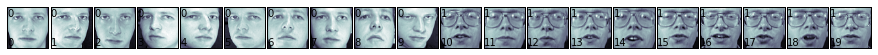

In [11]:
print_faces(faces.images, faces.target, 20)

Graficamos todos los rostros en una matriz 20x20, para cada uno, ponemos el valor objetivo (target value), en la esquina superior izquierda y el índice en la esquina inferior izquierda.

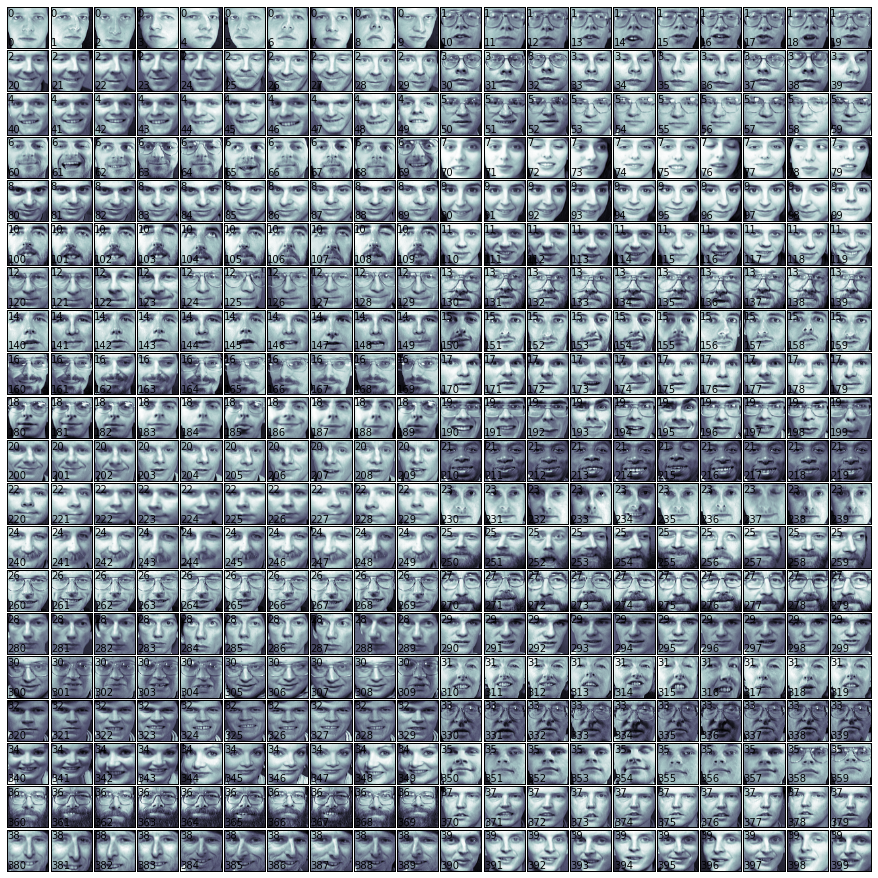

In [12]:
print_faces(faces.images, faces.target, 400)

Vamos a construir un clasificador o Classifier cuyo modelos es un hiperplano que separa instancias (puntos) de una clase del resto. Los métodos Support Vector Machines intentan obtener estos hiperplanos de una manera óptima, mediante la selección de las caracteristicas que tengan las mayores diferencias posibles con instancias de diferentes clases. Las nuevas instancias serán clasificadas como pertenecientes a una determinada categoría en función de que lado del hiperplano entran. Vamos a importar la clase SVC desde el módulo sklearn.svm SCV (Support Vector Classifier).

In [14]:
from sklearn.svm import SVC
svc_1 = SVC(kernel='linear')
print(svc_1)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


Creamos los conjuntos train y test

In [15]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
        faces.data, faces.target, test_size=0.25, random_state=0)

Establecemos 5-fold cross-validation

In [16]:
from sklearn.cross_validation import cross_val_score, KFold
from scipy.stats import sem

def evaluate_cross_validation(clf, X, y, K):
    # creamos un k-fold croos validation iterator
    cv = KFold(len(y), K, shuffle=True, random_state=0)
    # por defecto el puntaje usado es el devuelto por el estimator (exactitud)
    scores = cross_val_score(clf, X, y, cv=cv)
    print(scores)
    print(("Mean score: {0:.3f} (+/-{1:.3f})").format(
        np.mean(scores), sem(scores)))



In [17]:
evaluate_cross_validation(svc_1, X_train, y_train, 5)

[ 0.93333333  0.86666667  0.91666667  0.93333333  0.91666667]
Mean score: 0.913 (+/-0.012)


In [22]:
from sklearn import metrics

def train_and_evaluate(clf, X_train, X_test, y_train, y_test):
    
    clf.fit(X_train, y_train)
    
    print("Exactitud training set:")
    print(clf.score(X_train, y_train))
    print("Exactitud testing set:")
    print(clf.score(X_test, y_test))
    
    y_pred = clf.predict(X_test)
    
    print("Reporte de Classificador:")
    print(metrics.classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(metrics.confusion_matrix(y_test, y_pred))

Medimos precision y recall en el set de evaluación en cada clase

In [23]:
train_and_evaluate(svc_1, X_train, X_test, y_train, y_test)

Exactitud training set:
1.0
Exactitud testing set:
0.99
Reporte de Classificador:
             precision    recall  f1-score   support

          0       0.86      1.00      0.92         6
          1       1.00      1.00      1.00         4
          2       1.00      1.00      1.00         2
          3       1.00      1.00      1.00         1
          4       1.00      1.00      1.00         1
          5       1.00      1.00      1.00         5
          6       1.00      1.00      1.00         4
          7       1.00      0.67      0.80         3
          9       1.00      1.00      1.00         1
         10       1.00      1.00      1.00         4
         11       1.00      1.00      1.00         1
         12       1.00      1.00      1.00         2
         13       1.00      1.00      1.00         3
         14       1.00      1.00      1.00         5
         15       1.00      1.00      1.00         3
         17       1.00      1.00      1.00         6
         19     

## Discriminar personas con lentes o sin lentes (gafas)
El desempeño en el reconocimiento de rostro es bueno. Pero, hay un problema. Vamos a clasificar las imágenes de personas con y sin gafas

In [24]:
#indices de imagenes de personas con lentes
glasses = [(10, 19), (30, 32), (37, 38), (50, 59), (63, 64),
           (69, 69), (120, 121), (124, 129), (130, 139), (160, 161),
           (164, 169), (180, 182), (185, 185), (189, 189), (190, 192),
           (194, 194), (196, 199), (260, 269), (270, 279), (300, 309),
           (330, 339), (358, 359), (360, 369)]

Creamos un nuevo conjunto de training y test 

In [25]:
def create_target(segments):
    #creamos un nuevo array "y"
    y = np.zeros(faces.target.shape[0])
    
    # put 1 in the specified segments
    for (start, end) in segments:
        y[start:end + 1] = 1
    return y

In [26]:
target_glasses = create_target(glasses)

X_train, X_test, y_train, y_test = train_test_split(
    faces.data, target_glasses, test_size=0.25, random_state=0)

Utilizaremos un linear kernel (https://es.wikipedia.org/wiki/N%C3%BAcleo_%28matem%C3%A1tica%29)

In [27]:
svc_2 = SVC(kernel='linear')
evaluate_cross_validation(svc_2, X_train, y_train, 5)
train_and_evaluate(svc_2, X_train, X_test, y_train, y_test)

[ 1.          0.95        0.98333333  0.98333333  0.93333333]
Mean score: 0.970 (+/-0.012)
Exactitud training set:
1.0
Exactitud testing set:
0.99
Reporte de Classificador:
             precision    recall  f1-score   support

        0.0       1.00      0.99      0.99        67
        1.0       0.97      1.00      0.99        33

avg / total       0.99      0.99      0.99       100

Confusion Matrix:
[[66  1]
 [ 0 33]]


Casi perfecto. Ahora vamos a separar 10 imágenes completamente diferentes (todas de la misma persona), en unas con lentes y otras sin lentes. Con esto vamos a tratar de descartar las caracteristicas de los lentes. Separamos el objetivo con indices del 30 al 39. Entrenamos y evaluamos en el resto de las 390 instancias. Después de eso, vamos a evaluar de nuevo en los 10 casos separados.

In [28]:
X_test = faces.data[30:40]
y_test = target_glasses[30:40]

print(y_test.shape[0])

select = np.ones(target_glasses.shape[0])
select[30:40] = 0
X_train = faces.data[select == 1]
y_train = target_glasses[select == 1]

print(y_train.shape[0])

10
390


In [29]:
svc_3 = SVC(kernel='linear')
train_and_evaluate(svc_3, X_train, X_test, y_train, y_test)
y_pred = svc_3.predict(X_test)

Exactitud training set:
1.0
Exactitud testing set:
0.9
Reporte de Classificador:
             precision    recall  f1-score   support

        0.0       0.83      1.00      0.91         5
        1.0       1.00      0.80      0.89         5

avg / total       0.92      0.90      0.90        10

Confusion Matrix:
[[5 0]
 [1 4]]


Mostramos las caras de evaluación, y su predicción.

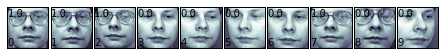

In [30]:
eval_faces = [np.reshape(a, (64, 64)) for a in X_test]
print_faces(eval_faces, y_pred, 10)